## Simple Exploratory Data Analysis

In [373]:
import pandas as pd
import numpy as np

# Load the data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
original=pd.read_csv('ObesityDataSet.csv')

train.head().T

,0,1,2,3,4
id,0,1,2,3,4
Gender,Male,Female,Female,Female,Male
Age,24.443011,18.0,18.0,20.952737,31.641081
Height,1.699998,1.56,1.71146,1.71073,1.914186
Weight,81.66995,57.0,50.165754,131.274851,93.798055
family_history_with_overweight,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,2.0,2.0,1.880534,3.0,2.679664
NCP,2.983297,3.0,1.411685,3.0,1.971472
CAEC,Sometimes,Frequently,Sometimes,Sometimes,Sometimes


In [374]:
# combine train and original Data
train=pd.concat([train,original],axis=0)

In [375]:
# Get categorical columns
categorical_columns=[]
for col in train.columns:
    if train[col].dtype=='object':
        categorical_columns.append(col)

categorical_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

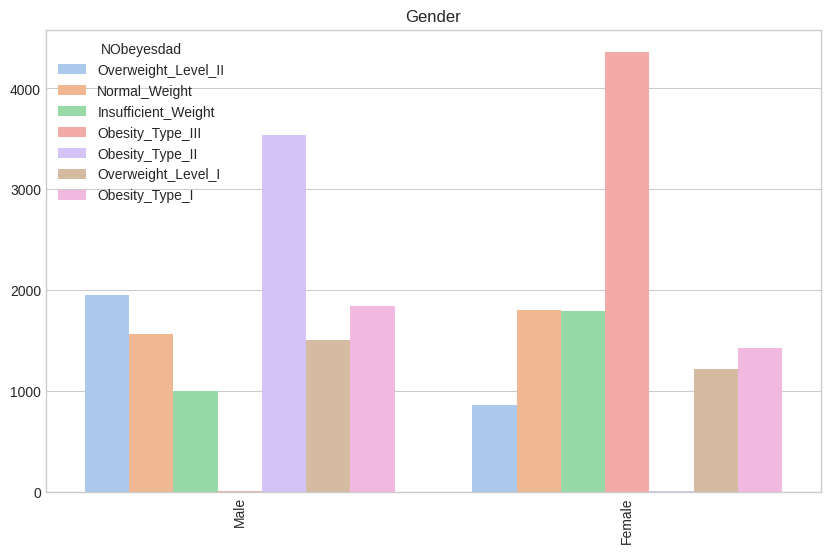

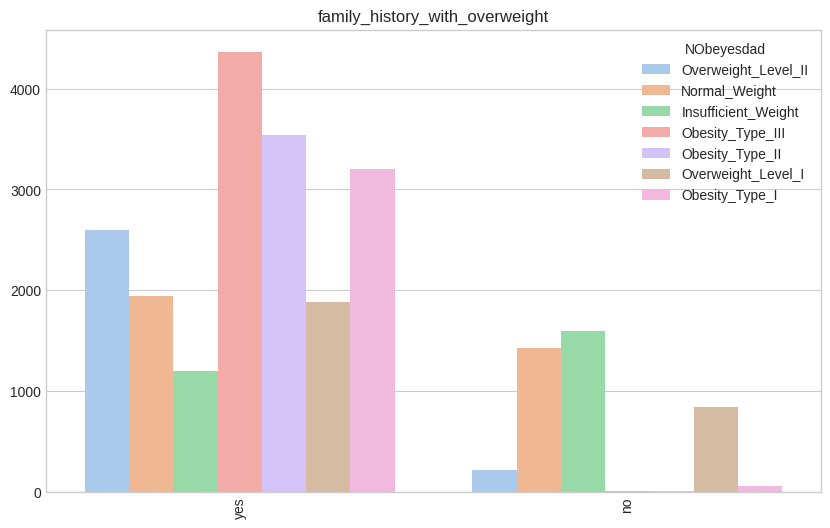

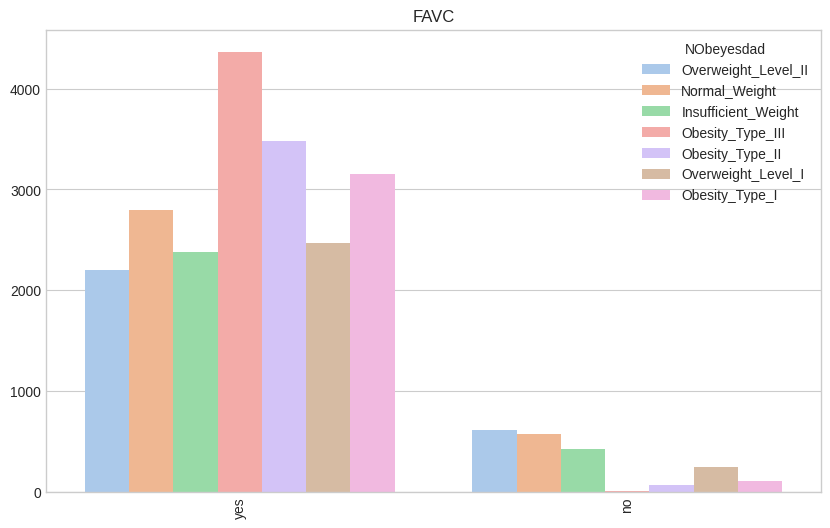

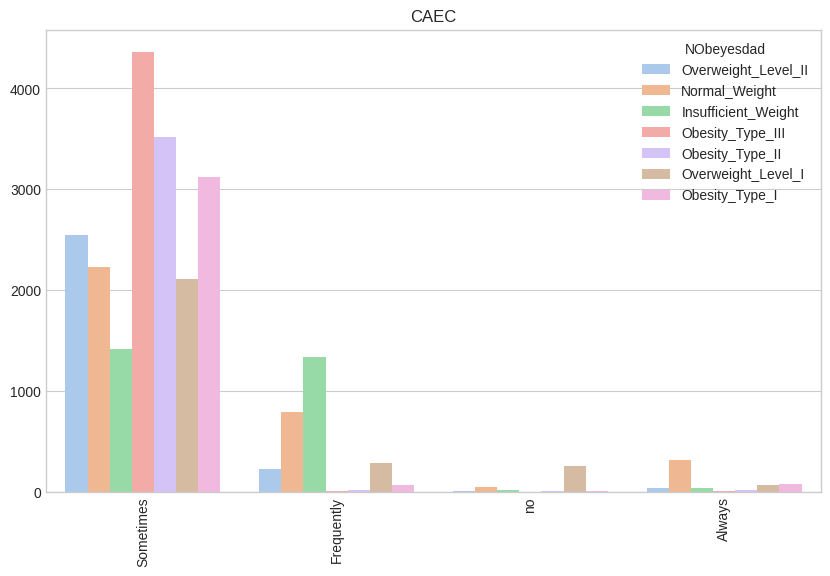

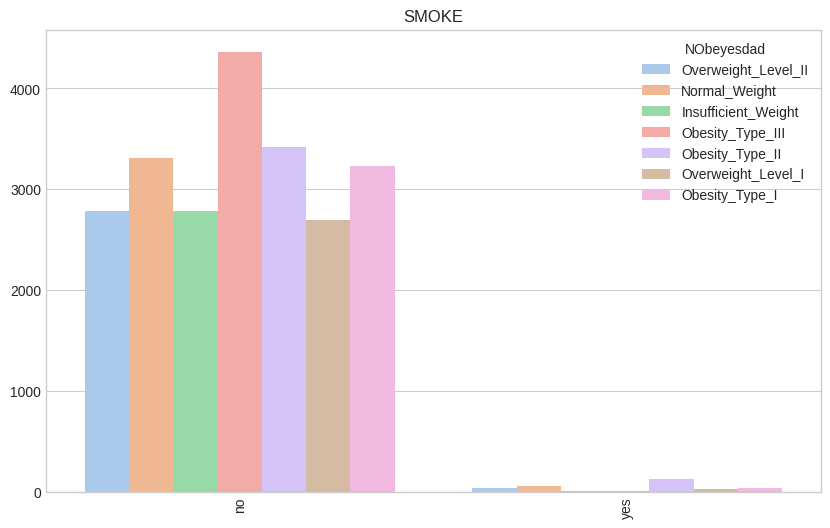

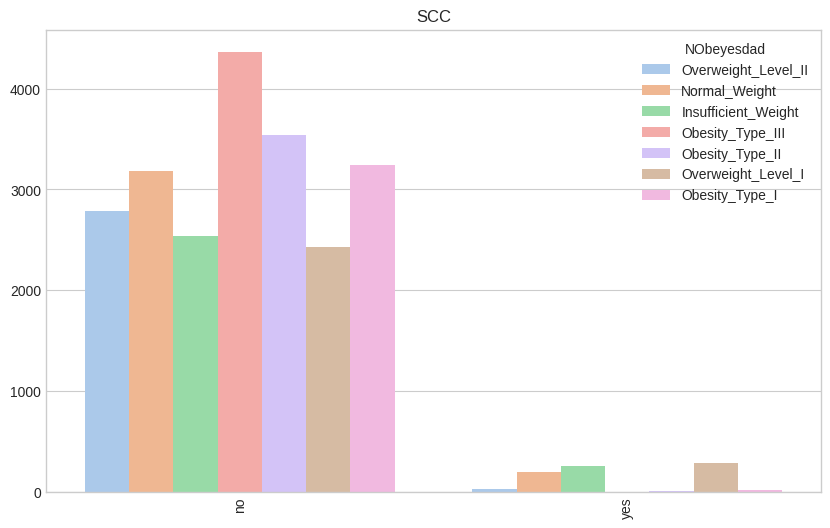

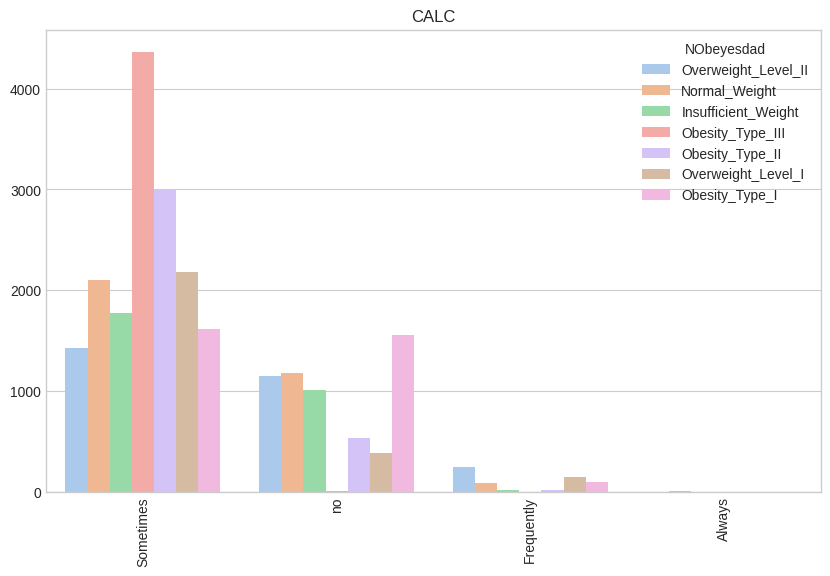

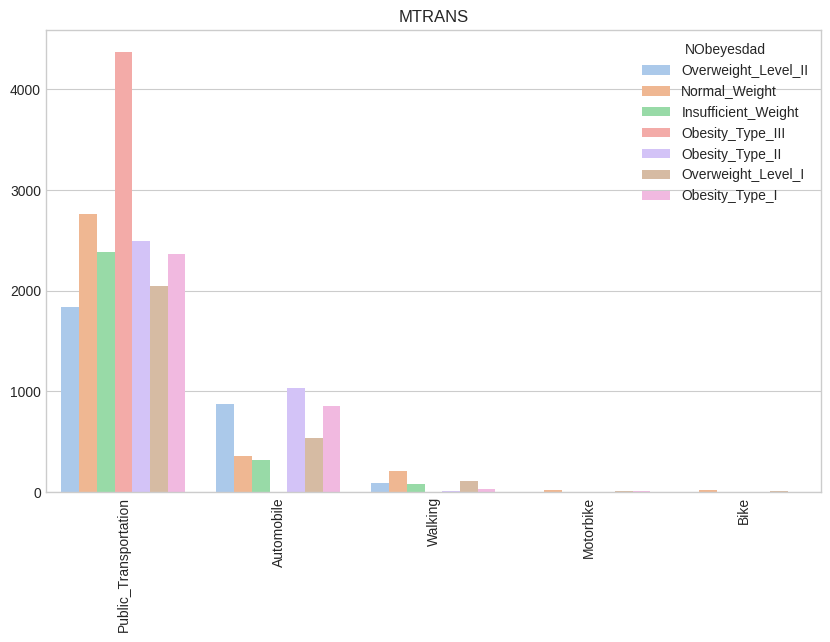

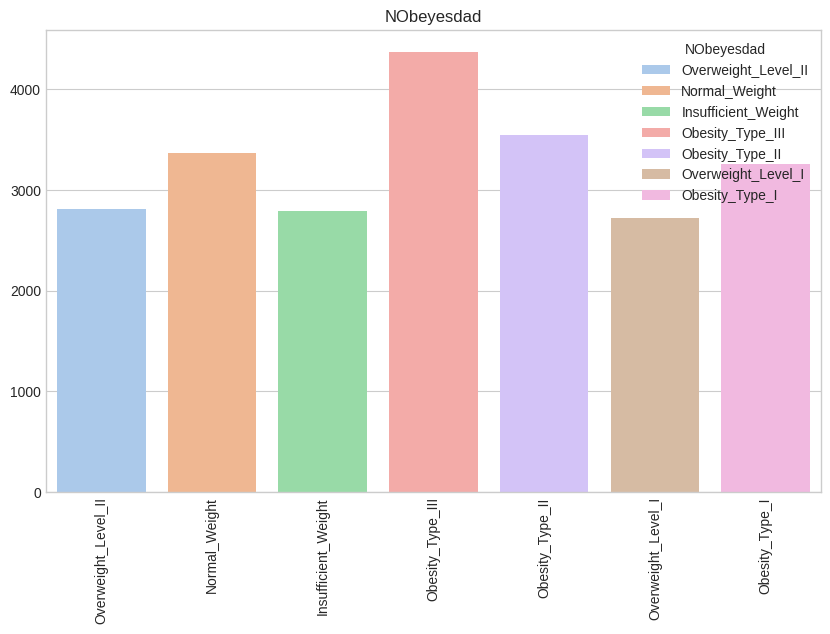

In [376]:
# Categorical columns Distribution with target
import matplotlib.pyplot as plt
import seaborn as sns

target="NObeyesdad"
for i in range(len(categorical_columns)):
    plt.figure(figsize=(10,6))
    sns.countplot(data=train,x=categorical_columns[i],hue=target,palette='pastel',legend=True)
    plt.xticks(rotation=90)
    plt.title(categorical_columns[i])
    plt.ylabel('')
    plt.xlabel('')
    plt.show()



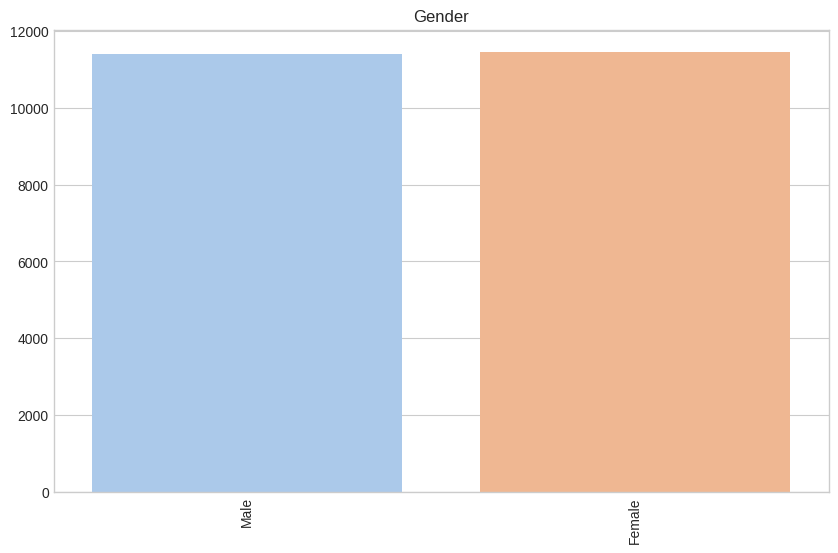

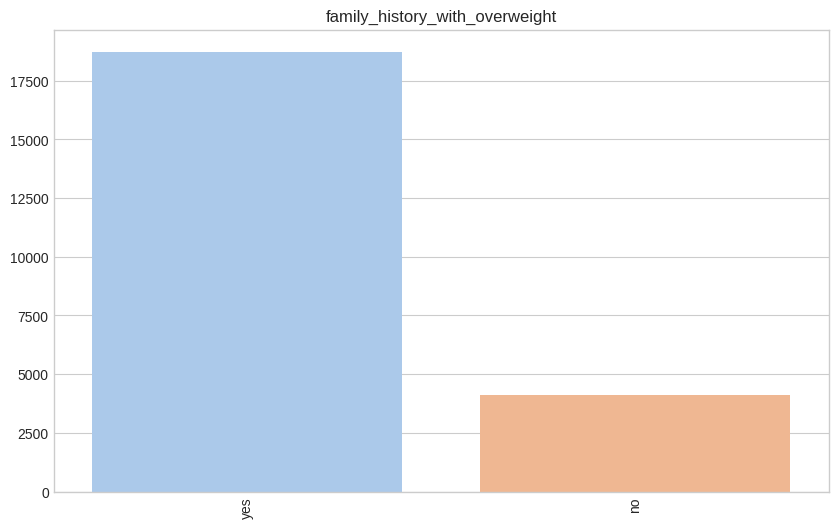

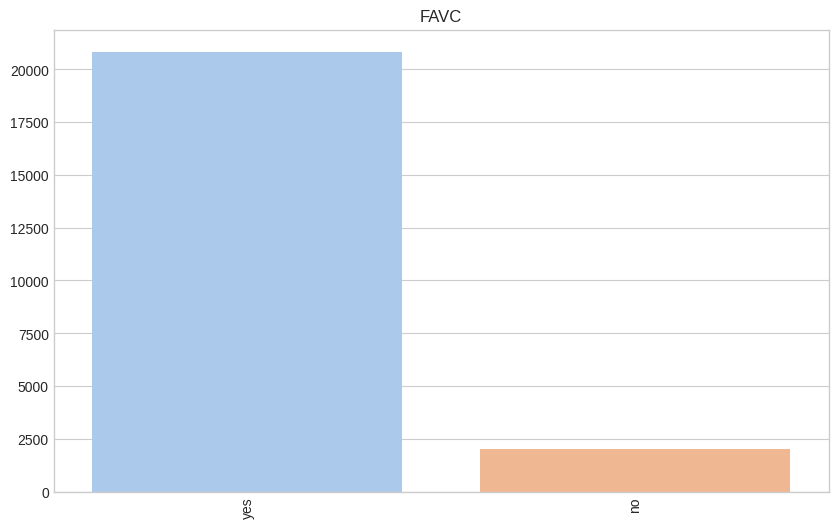

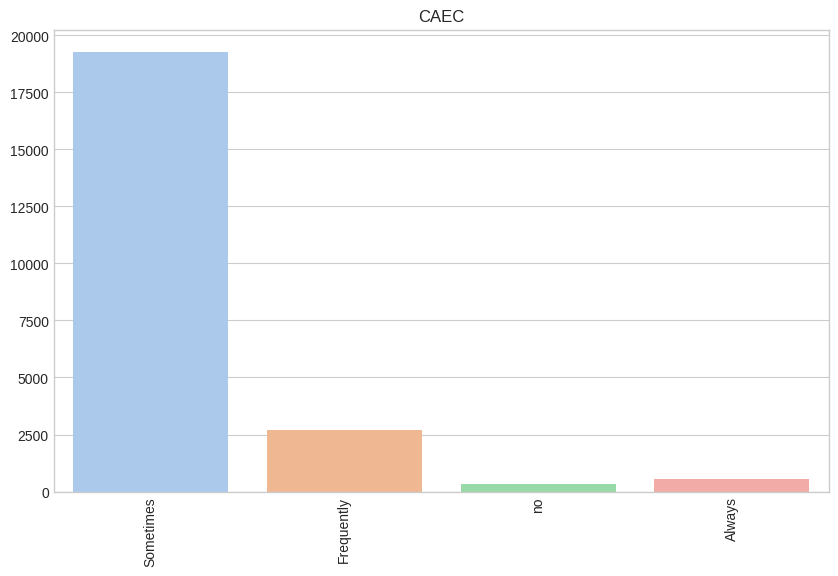

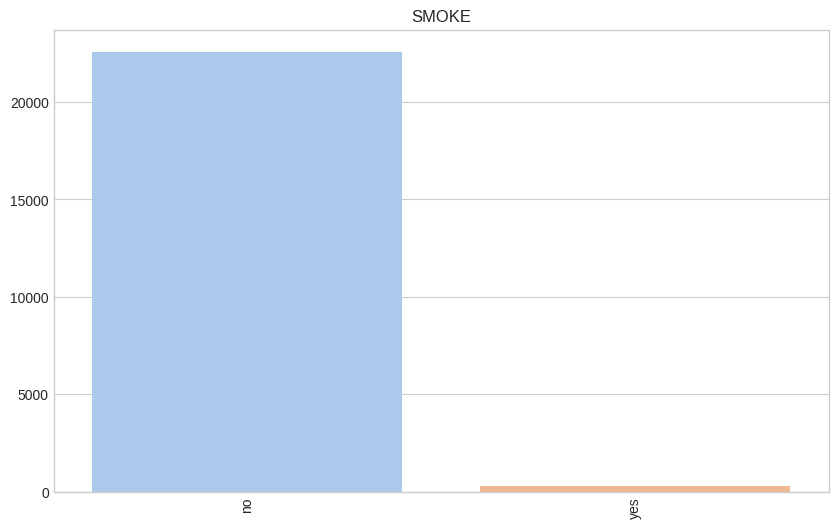

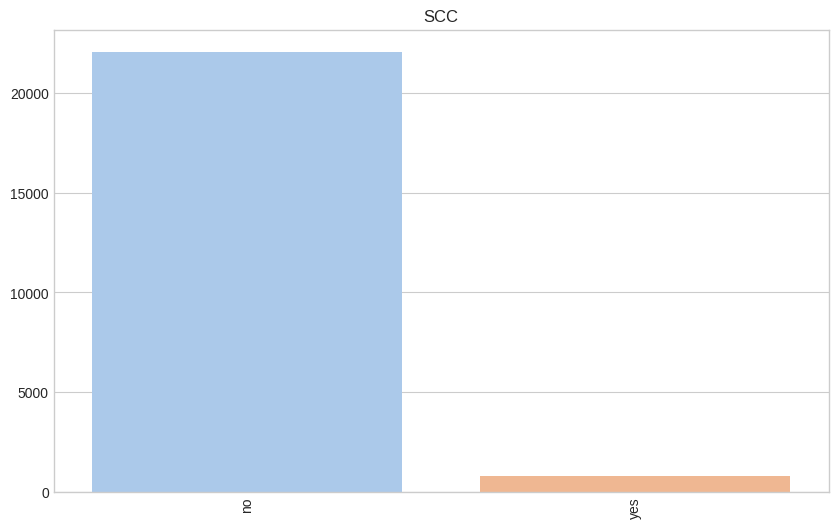

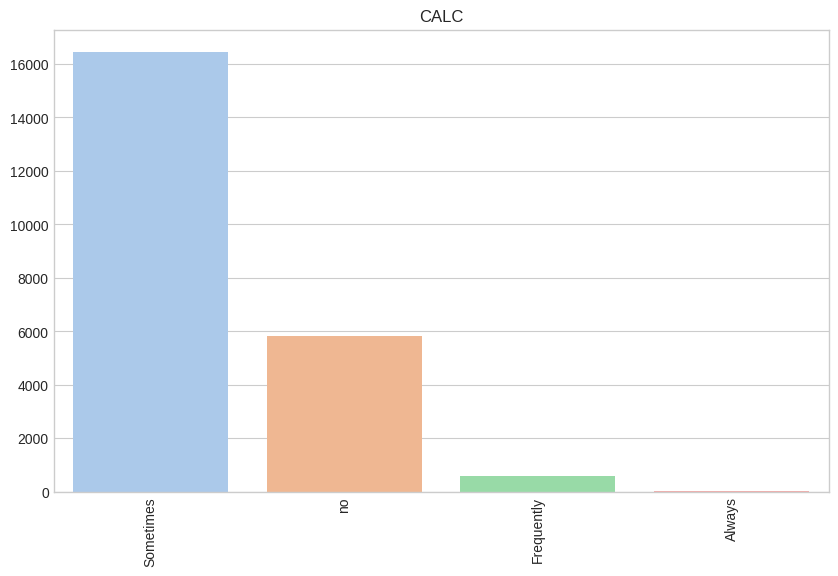

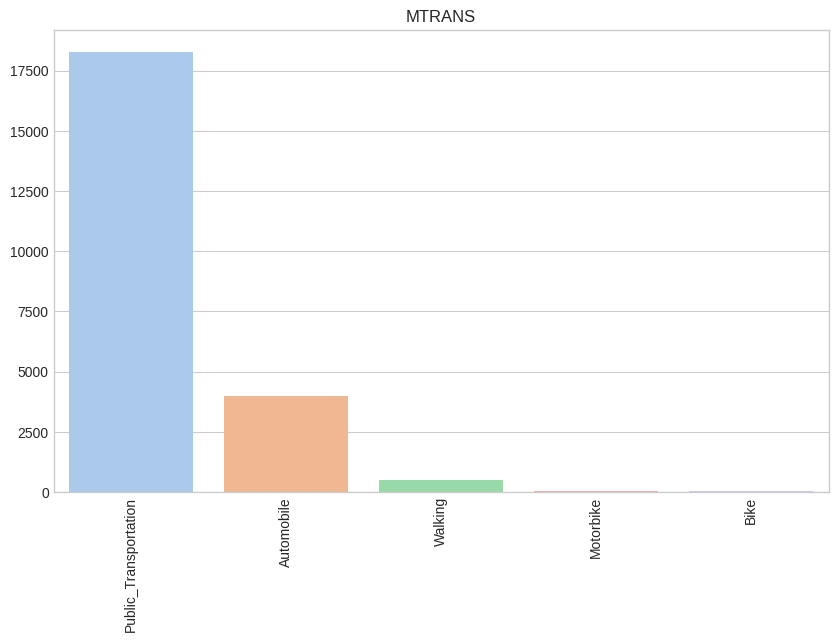

In [377]:
# Categorical columns Distribution in Test Data
target="NObeyesdad"
for col in [col for col in test.columns if test[col].dtype=='object']:
    plt.figure(figsize=(10,6))
    sns.countplot(data=train,x=col,hue=col,palette='pastel',legend=False)
    plt.xticks(rotation=90)
    plt.title(col)
    plt.ylabel('')
    plt.xlabel('')
    plt.show()


## Data Preprocessing

In [378]:
# Categorical column encoding; Here I use manual encoding
train['Gender']=train["Gender"].apply(lambda x: 1 if x=="Male" else 0)
test['Gender']=test["Gender"].apply(lambda x: 1 if x=="Male" else 0)

train['family_history_with_overweight']=train["family_history_with_overweight"].apply(lambda x: 1 if x=="yes" else 0)
test['family_history_with_overweight']=test["family_history_with_overweight"].apply(lambda x: 1 if x=="yes" else 0)

train['FAVC']=train["FAVC"].apply(lambda x: 1 if x=="yes" else 0)
test['FAVC']=test["FAVC"].apply(lambda x: 1 if x=="yes" else 0)

train['CAEC']=train["CAEC"].apply(lambda x: 1 if x=="no" else 2 if x=="Sometimes" else 3 if x=="Always" else 4)
test['CAEC']=test["CAEC"].apply(lambda x: 1 if x=="no" else 2 if x=="Sometimes" else 3 if x=="Always" else 4)

train['SMOKE']=train["SMOKE"].apply(lambda x: 1 if x=="yes" else 0)
test['SMOKE']=test["SMOKE"].apply(lambda x: 1 if x=="yes" else 0)

train['SCC']=train["SCC"].apply(lambda x: 1 if x=="yes" else 0)
test['SCC']=test["SCC"].apply(lambda x: 1 if x=="yes" else 0)

train['CALC']=train["CALC"].apply(lambda x: 1 if x=="no" else 2 if x=="Sometimes" else 3)
test['CALC']=test["CALC"].apply(lambda x: 1 if x=="no" else 2 if x=="Sometimes" else 3)

mapping={'Public_Transportation':1,
         'Automobile':2,
         'Motorbike':3,
         'Bike':4,
         'Walking':5}
train['MTRANS']=train["MTRANS"].replace(mapping)
test["MTRANS"]=test["MTRANS"].replace(mapping)

# target label encoding
target_mapping={'Insufficient_Weight':0,
                'Normal_Weight':1,
                'Overweight_Level_I':2,
                'Overweight_Level_II':3,
                'Obesity_Type_I':4,
                'Obesity_Type_II':5,
                'Obesity_Type_III':6}

train['NObeyesdad']=train["NObeyesdad"].replace(target_mapping)

In [379]:
# Feature Engineering

def feat_eng(df):
    df['BMI'] = df['Weight'] / (df['Height']**2)
    df["HealthyHabitRatio"] = (df["FCVC"] + df["CH2O"] + df["FAF"]) / (df["FAVC"] + df["CAEC"] + df["TUE"] + df["SMOKE"] * 2)
    df["Age_BMI"] = df["Age"] * df["BMI"]
    df["Age_HealthyHabitRatio"] = df["Age"] * df["HealthyHabitRatio"]
    df["Gender_SCC"]=df["Gender"]*df["SCC"]
    df["Height_Weight_Ratio"]=df["Height"]/df["Weight"]
    df["FAVC_CAEC_Index"]=df["FAVC"]/df["CAEC"]
    df["Activity_Index"]=df["FAF"]-df["TUE"]
    df["Water_Alcohol_Ratio"]=df["CH2O"]/df["CALC"]
    df["Meal_Frequency_Deviation"]=abs(df["NCP"]-3+1e-6)
    df["FamilyHistory_BMI_Interaction"]=(df["family_history_with_overweight"]+1e-6)*df["BMI"]

    return df


In [380]:
train=feat_eng(train)
test=feat_eng(test)

In [381]:
categorical_columns=categorical_columns.remove("NObeyesdad")

In [382]:
train=pd.get_dummies(train,columns=categorical_columns,drop_first=True) # Drop first to avoid multicolinearity. 
test=pd.get_dummies(test,columns=categorical_columns,drop_first=True)# multicolinearity is when one varibale can be predicted from others
categorical_columns

In [383]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

test.drop(columns=["id"],axis=1,inplace=True)
X= train.drop(columns=["NObeyesdad","id"],axis=1)
y=train["NObeyesdad"]
X=scaler.fit_transform(X) 
test=scaler.transform(test)

## Create a Model Class

In [392]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
from torch.utils.data import DataLoader,TensorDataset

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve, precision_recall_curve, auc
from tqdm.notebook import tqdm
import datetime
from torch.utils.tensorboard import SummaryWriter
plt.style.use('seaborn-whitegrid')

class DNN(object):
    def __init__(self,model,loss_fn,optimizer):
        # arguments as attributes
        self.model=model
        self.loss_fn=loss_fn
        self.optimizer=optimizer
        self.device='cuda' if torch.cuda.is_available() else 'cpu'
        self.model.to(self.device)

        # attributes to use in future, currently empty
        self.train_loader=None
        self.val_loader=None
        self.writer=None

        # attributes to be computed internally
        self.losses=[]
        self.val_losses=[]
        self.total_epochs=0

        # train step function
        self.train_step_fn=self._make_train_step_fn()
        # validation step function
        self.val_step_fn=self._make_val_step_fn()

    def to(self,device):
        try:
            self.device=device
            self.model.to(self.device)
        except RuntimeError:
            self.device='cuda' if torch.cuda.is_available() else 'cpu'
            print(f"Can't move to {device}, moving to {self.device} instead")
            self.model.to(self.device)

    def set_loaders(self,train_loader,val_loader=None):
        self.train_loader=train_loader
        self.val_loader=val_loader

    def set_tensorboard(self,name,folder='runs'):
        suffix=datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        self.writer=SummaryWriter(f"{folder}/{name}_{suffix}")

    def _make_train_step_fn(self):
        def peform_train_step_fn(X,y):
            # set model to train mode
            self.model.train()
            # forward pass
            yhat=self.model(X)
            # compute the loss
            loss=self.loss_fn(yhat,y)
            # compute gradients  
            loss.backward()
            # update weights
            self.optimizer.step()
            self.optimizer.zero_grad()

            return loss.item()
        return peform_train_step_fn 

    def _make_val_step_fn(self):
        def perform_val_step_fn(X,y):
            # set model to eval mode
            self.model.eval()

            yhat=self.model(X) 
            loss=self.loss_fn(yhat,y)
            return loss.item()
        return perform_val_step_fn
    
    def _mini_batch(self,validation=False):
        if validation:
            data_loader=self.val_loader
            step_fn=self.val_step_fn
        else:
            data_loader=self.train_loader
            step_fn=self.train_step_fn
        if data_loader is None:
            return None
        
        mini_batch_losses=[]
        for X_batch,y_batch in data_loader:
            X_batch=X_batch.to(self.device)
            y_batch=y_batch.to(self.device)

            mini_batch_loss=step_fn(X_batch,y_batch)
            mini_batch_losses.append(mini_batch_loss)
        loss=np.mean(mini_batch_losses)
        return loss
    
    def set_seed(self,seed=42):
        torch.backends.cudnn.deterministic=True
        torch.backends.cudnn.benchmark=False
        torch.manual_seed(seed)
        np.random.seed(seed)

    def train(self,n_epochs,seed=42):
        self.set_seed(seed)

        for epoch in tqdm(range(n_epochs)):
            self.total_epochs+=1

            # inner loop, perform training using mini batches
            loss=self._mini_batch(validation=False) # validation=False because we are training
            self.losses.append(loss)

            # validation
            with torch.no_grad():
                val_loss=self._mini_batch(validation=True)
                self.val_losses.append(val_loss)

            # for summary writer
            if self.writer:
                scalars={'training':loss}
                if val_loss is not None:
                    scalars.update({'validation':val_loss})
                self.writer.add_scalars(main_tag='loss',tag_scalar_dict=scalars,global_step=epoch) # global step is the x-axis

        if self.writer:
            self.writer.close() # close the writer

        
    def save_checkpoint(self,filename):
        # Build a dictionary with all information for resume training
        checkpoint={'epoch':self.total_epochs,
                    'model_state_dict':self.model.state_dict(),
                    'optimizer_state_dict':self.optimizer.state_dict(),
                    'loss':self.losses,
                    'val_loss':self.val_losses}
        torch.save(checkpoint,filename)

    def load_checkpoint(self,filename):
        checkpoint=torch.load(filename)

        # Restore the state of the model
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        self.total_epochs=checkpoint['epoch']
        self.losses=checkpoint['loss']
        self.val_losses=checkpoint['val_loss']

        self.model.train() # always set the model to training mode after loading the checkpoint
        
    def predict(self,X):
        self.model.eval()
        X_tensor=torch.as_tensor(X,dtype=torch.float32,device=self.device)
        yhat_tensor=self.model(X_tensor)
        self.model.train()
        return yhat_tensor.detach().cpu().numpy()
    
    def plot_losses(self):
        fig=plt.figure(figsize=(10,4))
        plt.plot(self.losses,label='Training Loss',c='b')
        plt.plot(self.val_losses,label='Validation Loss',c='r')
        plt.yscale('log')
        plt.xlabel('Epochs')
        plt.ylabel("loss")
        plt.legend()
        plt.tight_layout()
        plt.show()
        return fig
    
    def add_graph(self):
        # fetches a single mini batch
        if self.train_loader and self.writer:
            X_sample,y_sample=next(iter(self.train_loader))
            self.writer.add_graph(self.model,X_sample.to(self.device))


/tmp/ipykernel_4335/100947835.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Data Preparation


In [393]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

# convert pd series objectd to numpy arrays
y_train=y_train.to_numpy()
y_val=y_val.to_numpy()

torch.manual_seed(13)
X_train_tensor=torch.as_tensor(X_train).float()
y_train_tensor=torch.as_tensor(y_train.reshape(-1,1)).float()

X_val_tensor=torch.as_tensor(X_val).float()
y_val_tensor=torch.as_tensor(y_val.reshape(-1,1)).float()

train_dataset=TensorDataset(X_train_tensor,y_train_tensor)
val_dataset=TensorDataset(X_val_tensor,y_val_tensor)

train_loader=DataLoader(train_dataset,batch_size=16,shuffle=True)
val_loader=DataLoader(val_dataset,batch_size=16)

## Model config

In [394]:
learning_rate=0.001

torch.manual_seed(42)
model=nn.Sequential()
model.add_module('hidden1',nn.Linear(27,64))
model.add_module('activation1',nn.ReLU())
model.add_module('hidden2',nn.Linear(64,16))
model.add_module('activation2',nn.ReLU())
model.add_module('output',nn.Linear(16,7))
model.add_module('softmax',nn.Softmax(dim=1))

optimizer=optim.Adam(model.parameters(),lr=learning_rate)
loss_fn=nn.CrossEntropyLoss() 


In [395]:
n_epochs=100
ann=DNN(model,loss_fn,optimizer)
ann.set_loaders(train_loader,val_loader)
ann.train(n_epochs)

  0%|          | 0/100 [00:00<?, ?it/s]

RuntimeError: "log_softmax_lastdim_kernel_impl" not implemented for 'Long'

In [ ]:
X_val

array([[-0.99733618, -0.45244087,  0.2223035 , ..., -0.67908117,
        -0.52102499,  1.27443577],
       [ 1.00267093, -0.50149765, -0.0042918 , ...,  0.43996289,
        -0.52102499, -0.02663016],
       [ 1.00267093,  3.42529697, -1.19723702, ...,  1.62362032,
        -0.52102499,  0.28670899],
       ...,
       [-0.99733618, -0.77409598, -0.24769427, ..., -0.04149949,
         0.90011145,  0.10610456],
       [ 1.00267093,  0.97297208,  2.37516936, ..., -1.17608518,
        -0.52102499,  0.63871075],
       [-0.99733618,  0.3675699 , -0.51778112, ...,  0.24112961,
        -0.52102499,  1.02415765]])

In [ ]:
ann.predict(X_val).shape

(4574, 7)

In [396]:
ann.predict(X_val).argmax(axis=1) # axis=1

array([0, 0, 0, ..., 0, 0, 0])

In [397]:
y_val

array([6, 2, 4, ..., 3, 5, 6])